# Exercise: Using a trained model on a new dataset

In this exercise, we will fit a model to a first dataset, and then use the fitted model to run inference on a second, unseen dataset.

## Create first dataset

Let's begin by creating the first dataset

In [1]:

# Make a dictionary of data for shoe sizes in cm
# and person height in cm

data = {
    'shoe_length' : [24, 18, 28, 31, 16, 34, 25, 19, 25, 33,
                    19, 29, 29, 32, 19, 25, 24, 15, 16, 33,
                    28, 18, 15, 19, 26, 24, 28, 16, 22, 31,
                    ],
    'height': [167, 148, 180, 198, 153, 207, 183, 157, 167, 188,
               152, 184, 174, 191, 164, 176, 177, 145, 171, 200,
               175, 149, 149, 149, 175, 183, 190, 172, 175, 175]
}


## Split dataset into training and testing sets

Now, we split the dataset into a training and testing set

In [2]:
import matplotlib.pyplot as graph
import statsmodels.formula.api as smf
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from numpy import reshape,array
import numpy as np

X = array(data["shoe_length"])
Y = array(data["height"])

 #random_state for reproducibilty
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

#reshape for use with sklearn LinearRegression()

X_train = X_train.reshape(-1,1)
Y_train = Y_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
Y_test = Y_test.reshape(-1,1)

## Create and test the model

Let's create our model using the training data, and visualise its performance as a graph, and in terms of RMSE

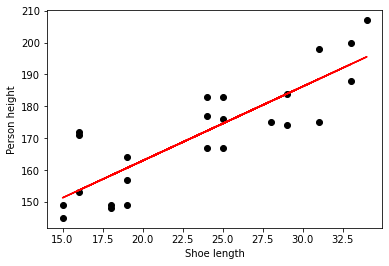

RMSE: 9.015360720619682


In [3]:
# Create linear regression model
model = LinearRegression().fit(X_train,Y_train)

Y_train_pred = model.predict(X_train)

# Show a graph of the result
# Don't worry about how this is done for now
%matplotlib inline
intercept = model.intercept_
slope = model.coef_
line = slope * X_train + intercept
graph.scatter(X_train, Y_train,  color='black')
graph.plot(X_train, line, '-', c = 'red')
graph.ylabel('Person height')
graph.xlabel("Shoe length")
graph.show()

rms_train = mean_squared_error(Y_train,Y_train_pred, squared=False)
print(f"RMSE: {rms_train}")



Now let's test the model's performance on the test data, and visualise its performance as a graph, and in terms of RMSE

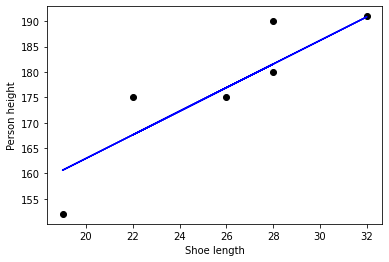

RMSE: 5.861052567932772


In [4]:
Y_test_pred = model.predict(X_test)

# Show a graph of the result
# Don't worry about how this is done for now
%matplotlib inline
intercept = model.intercept_
slope = model.coef_
line = slope * X_test + intercept
graph.scatter(X_test, Y_test,  color='black')
graph.plot(X_test, line, '-', c = 'blue')
graph.ylabel('Person height')
graph.xlabel("Shoe length")
graph.show()

rms_test = mean_squared_error(Y_test,Y_test_pred, squared=False)
print(f"RMSE: {rms_test}")

## Create second dataset

We would like to see how well our trained model performs on a brand new, unseen dataset

In [5]:
extra_data = {
    'shoe_length' : [21, 19, 21, 37, 11, 37, 22, 22, 20, 39,
                    11, 33, 26, 38, 12, 29, 21, 19, 15, 37,
                    25, 22, 13, 26, 23, 27, 23, 19, 20, 36,
                    ],
    'height': [164, 150, 175, 199, 150, 200, 177, 167, 160, 190,
               149, 188, 170, 198, 179, 179, 173, 149, 168, 207,
               173, 149, 148, 149, 173, 187, 188, 177, 187, 178]
}



## Testing second dataset

We are testing the entire dataset this time, so we don't need to split it into test and train sets

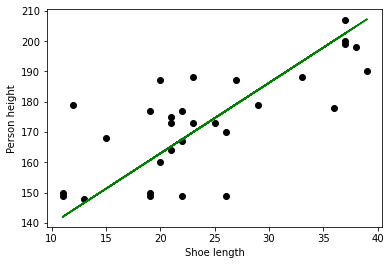

RMSE: 13.468833142938248


In [6]:
X_new = array(extra_data["shoe_length"])
Y_new = array(extra_data["height"])

X_new = X_new.reshape(-1,1)
Y_new = Y_new.reshape(-1,1)

Y_new_pred = model.predict(X_new)

# Show a graph of the result
# Don't worry about how this is done for now
%matplotlib inline
intercept = model.intercept_
slope = model.coef_
line = slope * X_new + intercept
graph.scatter(X_new, Y_new,  color='black')
graph.plot(X_new, line, '-', c = 'green')
graph.ylabel('Person height')
graph.xlabel("Shoe length")
graph.show()

rms_new = mean_squared_error(Y_new,Y_new_pred, squared=False)
print(f"RMSE: {rms_new}")
